<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/p3_boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: # prompt: import np, pd, sns , plt , train test split , xgbregressor , metrics from sklearn ,

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [6]:
df.shape

(506, 14)

In [7]:
df.rename(columns={'MEDV': 'price'},inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [13]:
df.shape

(394, 14)

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.groupby(['price']).describe()

CRIM                                                                   \
      count       mean        std       min        25%        50%        75%   
price                                                                          
5.0     2.0  53.136300  20.908440  38.35180  45.744050  53.136300  60.528550   
5.6     1.0  25.046100        NaN  25.04610  25.046100  25.046100  25.046100   
6.3     1.0   9.916550        NaN   9.91655   9.916550   9.916550   9.916550   
7.0     2.0  22.964735  32.217715   0.18337  11.574053  22.964735  34.355418   
7.2     2.0  17.448200   0.900006  16.81180  17.130000  17.448200  17.766400   
...     ...        ...        ...       ...        ...        ...        ...   
44.8    1.0   0.315330        NaN   0.31533   0.315330   0.315330   0.315330   
45.4    1.0   0.035780        NaN   0.03578   0.035780   0.035780   0.035780   
46.0    1.0   0.061290        NaN   0.06129   0.061290   0.061290   0.061290   
48.5    1.0   0.035100        NaN   0.03510   0.035100   0.035100   0.035100   
50.0   12.0   2.592612   3.387281   0.01381   0.400220   1.037450   3.142333   

                   ZN             ...         B         LSTAT             \
            max count       mean  ...       75%     max count       mean   
price                             ...                                      
5.0    67.92080   2.0   0.000000  ...  393.9175  396.90   2.0  26.785000   
5.6    25.04610   1.0   0.000000  ...  396.9000  396.90   1.0  26.770000   
6.3     9.91655   1.0   0.000000  ...  338.1600  338.16   1.0  29.970000   
7.0    45.74610   2.0   0.000000  ...  280.1050  344.05   2.0  30.475000   
7.2    18.08460   2.0   0.000000  ...  304.4875  396.90   2.0  29.930000   
...         ...   ...        ...  ...       ...     ...   ...        ...   
44.8    0.31533   1.0   0.000000  ...  385.0500  385.05   1.0   4.140000   
45.4    0.03578   1.0  20.000000  ...  387.3100  387.31   1.0   3.760000   
46.0    0.06129   1.0  20.000000  ...  377.0700  377.07   1.0   3.010000   
48.5    0.03510   1.0  95.000000  ...  392.7800  392.78   1.0   3.810000   
50.0    9.23230  12.0  25.416667  ...  390.9250  395.52  12.0   4.576667   

                                                         
            std    min      25%     50%      75%    max  
price                                                    
5.0    5.381083  22.98  24.8825  26.785  28.6875  30.59  
5.6         NaN  26.77  26.7700  26.770  26.7700  26.77  
6.3         NaN  29.97  29.9700  29.970  29.9700  29.97  
7.0    9.199459  23.97  27.2225  30.475  33.7275  36.98  
7.2    1.244508  29.05  29.4900  29.930  30.3700  30.81  
...         ...    ...      ...     ...      ...    ...  
44.8        NaN   4.14   4.1400   4.140   4.1400   4.14  
45.4        NaN   3.76   3.7600   3.760   3.7600   3.76  
46.0        NaN   3.01   3.0100   3.010   3.0100   3.01  
48.5        NaN   3.81   3.8100   3.810   3.8100   3.81  
50.0   2.655380   1.73   2.9400   3.430   5.7000   9.53  

[205 rows x 104 columns]

In [17]:
correlation = df.corr()

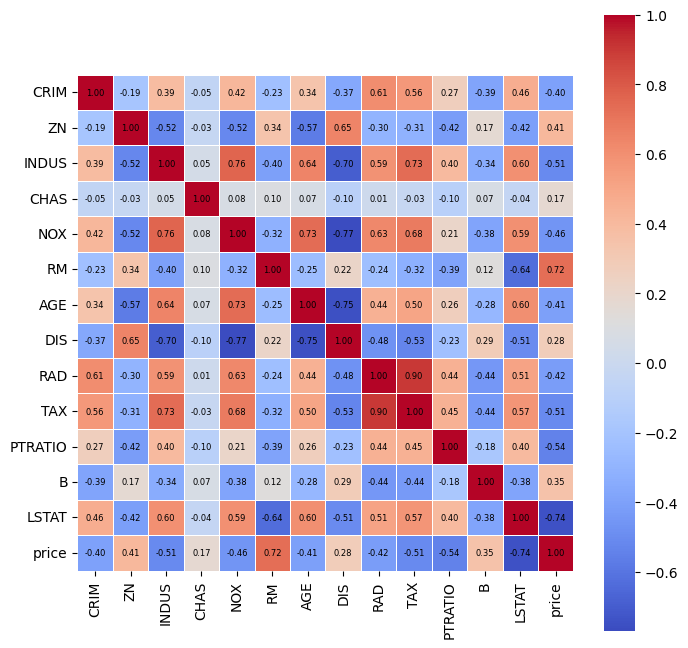

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(
    correlation,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar=True,
    square=True,
    annot_kws={"size": 6, "color": "black"}
)
plt.show()


In [27]:
x = df.drop(['price'],axis=1)
y = df['price']
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(295, 13) (99, 13) (295,) (99,)


In [29]:
model =XGBRegressor()
model.fit(x_train,y_train)

# accuracy of train and test
x_train_prediction = model.predict(x_train)
x_test_prediction = model.predict(x_test)

accuracy_train = metrics.r2_score(y_train,x_train_prediction)
accuracy_test = metrics.r2_score(y_test,x_test_prediction)

print("accuracy train is:",accuracy_train,"\naccurscy test is:" ,accuracy_test)#this is regression so accuracy score do not make sense

accuracy train is: 0.9999996113018051 
accurscy test is: 0.7610338276903453


In [30]:
error_train = metrics.mean_absolute_error(y_train,x_train_prediction)
error_test = metrics.mean_absolute_error(y_test,x_test_prediction)
print("error train is:",error_train,"\nerror test is:" ,error_test)

error train is: 0.0037492616297835576 
error test is: 2.7392501831054688


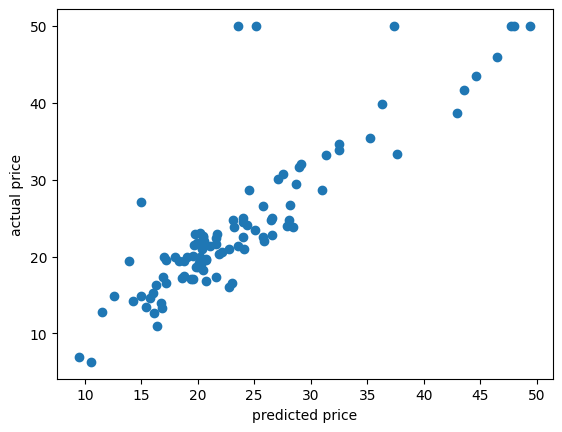

In [31]:
plt.scatter(x_test_prediction,y_test)
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.show()

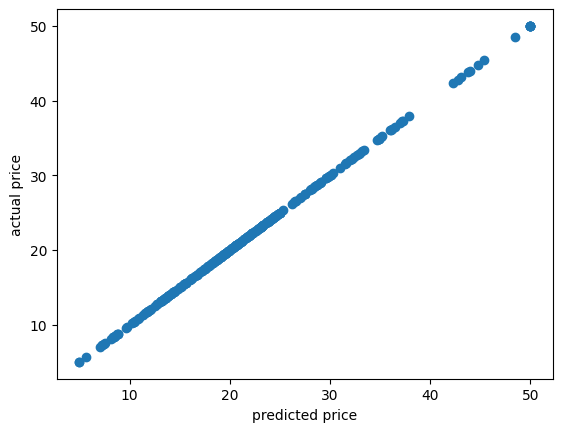

In [33]:
plt.scatter(x_train_prediction,y_train)
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.show()